In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn
perf_dir = 'perf/'
pkl_dir = 'pkl/'

In [2]:
# with m scale = 100
mscale = 1e2
lqe_qkf_results_all = pickle.load(open(os.path.join(pkl_dir, f'lqe_qkf_results-mscale={int(mscale)}.pkl'), 'rb'))
ekf_results_all = pickle.load(open(os.path.join(pkl_dir, f'ekf_results-mscale={int(mscale)}.pkl'), 'rb'))
qkf_results_all = pickle.load(open(os.path.join(pkl_dir, f'qkf_results-mscale={int(mscale)}.pkl'), 'rb'))


err_list_lqe_qkf_all = lqe_qkf_results_all[0]
var_list_lqe_qkf_all = lqe_qkf_results_all[1]

err_list_ekf_all = ekf_results_all[0]
var_list_ekf_all = ekf_results_all[1]
cost_list_ekf_all = ekf_results_all[2]

err_list_qkf_all = qkf_results_all[0]
var_list_qkf_all = qkf_results_all[1]
cost_list_qkf_all = qkf_results_all[2]

err_list_lqe_qkf_avg = np.mean(err_list_lqe_qkf_all, axis=0)
var_list_lqe_qkf_avg = np.mean(var_list_lqe_qkf_all, axis=0)
err_list_ekf_avg = np.mean(err_list_ekf_all, axis=0)
err_list_qkf_avg = np.mean(err_list_qkf_all, axis=0)
var_list_ekf_avg = np.mean(var_list_ekf_all, axis=0)
var_list_qkf_avg = np.mean(var_list_qkf_all, axis=0)
cost_list_ekf_avg = np.mean(cost_list_ekf_all, axis=0)
cost_list_qkf_avg = np.mean(cost_list_qkf_all, axis=0)

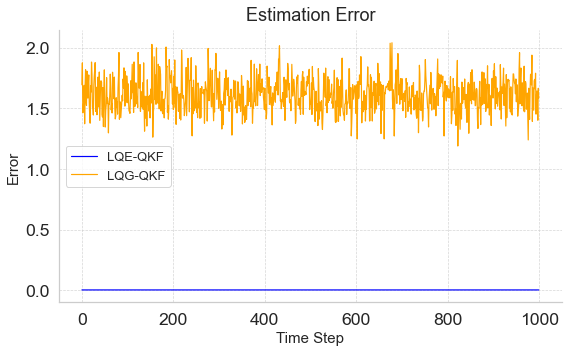

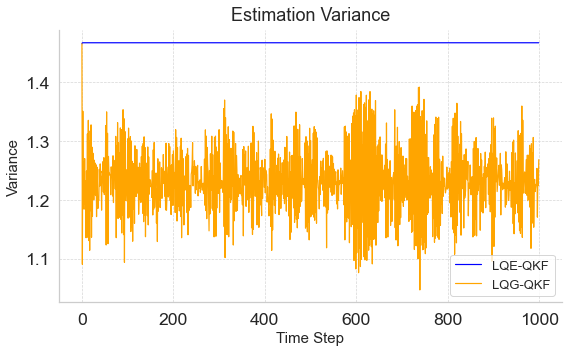

In [3]:
# --- Estimation Error Plot (LQE-QKF vs LQG-QKF) ---
sns.set_theme(style="whitegrid", font_scale=1.6, rc={"lines.linewidth": 1.5})

fig_err, ax_err = plt.subplots(figsize=(8, 5))
sns.lineplot(
    x=np.arange(len(err_list_lqe_qkf_avg)), y=err_list_lqe_qkf_avg, 
    label='LQE-QKF', color='blue', ax=ax_err, linewidth=1.2
)
sns.lineplot(
    x=np.arange(len(err_list_qkf_avg)), y=err_list_qkf_avg, 
    label='LQG-QKF', color='orange', ax=ax_err, linewidth=1.2
)
ax_err.set_title('Estimation Error', fontsize=18, pad=10)
ax_err.set_xlabel('Time Step', fontsize=15)
ax_err.set_ylabel('Error', fontsize=15)
ax_err.legend(fontsize=13, frameon=True)
ax_err.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.8)
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'estimation_error-mscale={int(mscale)}.png'), dpi=300, bbox_inches='tight')
plt.show()

# --- Estimation Variance Plot (LQE-QKF vs LQG-QKF) ---
fig_var, ax_var = plt.subplots(figsize=(8, 5))
sns.lineplot(
    x=np.arange(len(var_list_lqe_qkf_avg)), y=var_list_lqe_qkf_avg, 
    label='LQE-QKF', color='blue', ax=ax_var, linewidth=1.2
)
sns.lineplot(
    x=np.arange(len(var_list_qkf_avg)), y=var_list_qkf_avg, 
    label='LQG-QKF', color='orange', ax=ax_var, linewidth=1.2
)
ax_var.set_title('Estimation Variance', fontsize=18, pad=10)
ax_var.set_xlabel('Time Step', fontsize=15)
ax_var.set_ylabel('Variance', fontsize=15)
ax_var.legend(fontsize=13, frameon=True)
ax_var.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.8)
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'estimation_variance-mscale={int(mscale)}.png'), dpi=300, bbox_inches='tight')
plt.show()

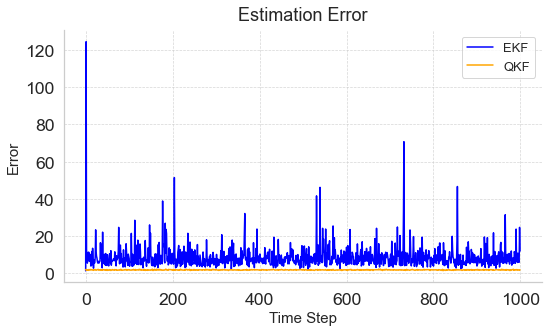

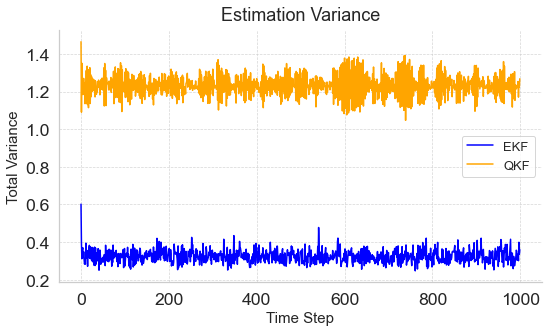

In [4]:
# --- Estimation Error Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6, rc={"lines.linewidth": 1.5})

fig_err, ax_err = plt.subplots(figsize=(8, 5))
sns.lineplot(
    x=np.arange(len(err_list_ekf_avg)), y=err_list_ekf_avg, 
    label='EKF', color='blue', ax=ax_err, linewidth=1.5
)
sns.lineplot(
    x=np.arange(len(err_list_qkf_avg)), y=err_list_qkf_avg, 
    label='QKF', color='orange', ax=ax_err, linewidth=1.5
)
ax_err.set_title('Estimation Error', fontsize=18, pad=10)
ax_err.set_xlabel('Time Step', fontsize=15)
ax_err.set_ylabel('Error', fontsize=15)
ax_err.legend(fontsize=13, frameon=True)
ax_err.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.8)
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'estimate_error-mscale={int(mscale)}.png'), dpi=300, bbox_inches='tight')
plt.show()

# --- Estimation Vriance Plot ---
fig_cov, ax_cov = plt.subplots(figsize=(8, 5))
sns.lineplot(
    x=np.arange(len(var_list_ekf_avg)), y=var_list_ekf_avg, 
    label='EKF', color='blue', ax=ax_cov, linewidth=1.5
)
sns.lineplot(
    x=np.arange(len(var_list_qkf_avg)), y=var_list_qkf_avg, 
    label='QKF', color='orange', ax=ax_cov, linewidth=1.5
)
ax_cov.set_title('Estimation Variance', fontsize=18, pad=10)
ax_cov.set_xlabel('Time Step', fontsize=15)
ax_cov.set_ylabel('Total Variance', fontsize=15)
ax_cov.legend(fontsize=13, frameon=True)
ax_cov.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.8)
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'estimate_variance-mscale={int(mscale)}.png'), dpi=300, bbox_inches='tight')
plt.show()

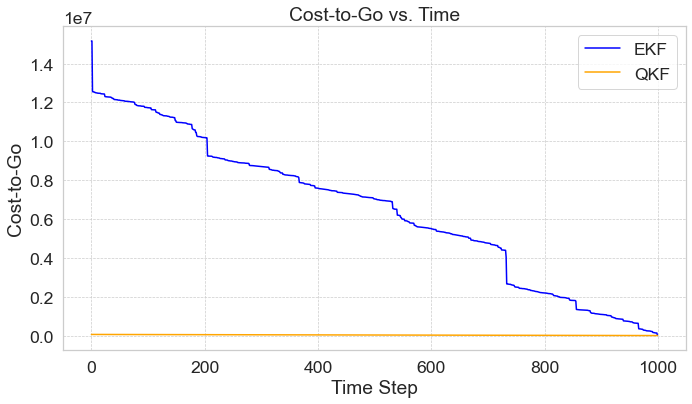

In [5]:
# plot: cost-to-go vs. time
plt.figure(figsize=(10, 6))
plt.plot(cost_list_ekf_avg, label='EKF', color='blue')
plt.plot(cost_list_qkf_avg, label='QKF', color='orange')
plt.title('Cost-to-Go vs. Time')
plt.xlabel('Time Step')
plt.ylabel('Cost-to-Go')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'cost_perf-mscale={int(mscale)}.png'), dpi=300, bbox_inches='tight')
plt.show()

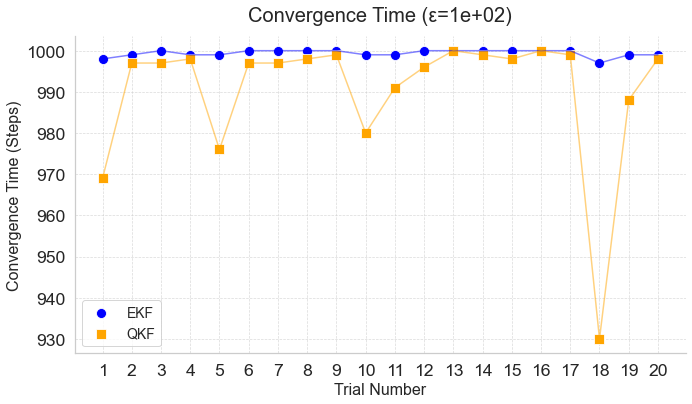

In [6]:
# plot convergence vs. trial (polished version)
sns.set_theme(style="whitegrid", font_scale=1.6, rc={"lines.linewidth": 2.5})

trials = 20
H = 1000  # horizon length
convergence_list_ekf = [H] * trials
convergence_list_qkf = [H] * trials
epsilon = 1e2

for trial in range(trials):
    for timestep in range(H):
        if cost_list_ekf_all[trial][timestep] < epsilon:
            convergence_list_ekf[trial] = timestep
            break        
    for timestep in range(H):
        if cost_list_qkf_all[trial][timestep] < epsilon:
            convergence_list_qkf[trial] = timestep
            break

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=np.arange(1, trials + 1), y=convergence_list_ekf, label='EKF', color='blue', s=100, marker='o', ax=ax)
sns.scatterplot(x=np.arange(1, trials + 1), y=convergence_list_qkf, label='QKF', color='orange', s=100, marker='s', ax=ax)
sns.lineplot(x=np.arange(1, trials + 1), y=convergence_list_ekf, color='blue', ax=ax, linewidth=1.5, alpha=0.5)
sns.lineplot(x=np.arange(1, trials + 1), y=convergence_list_qkf, color='orange', ax=ax, linewidth=1.5, alpha=0.5)

ax.set_title(f'Convergence Time (ε={epsilon:.0e})', fontsize=20, pad=15)
ax.set_xlabel('Trial Number', fontsize=16)
ax.set_ylabel('Convergence Time (Steps)', fontsize=16)
ax.set_xticks(np.arange(1, trials + 1, 1))
ax.legend(fontsize=14, frameon=True)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
sns.despine()

plt.tight_layout()
plt.savefig(os.path.join(perf_dir, f'convergence_perf-mscale={int(mscale)}.png'), dpi=300, bbox_inches='tight')
plt.show()

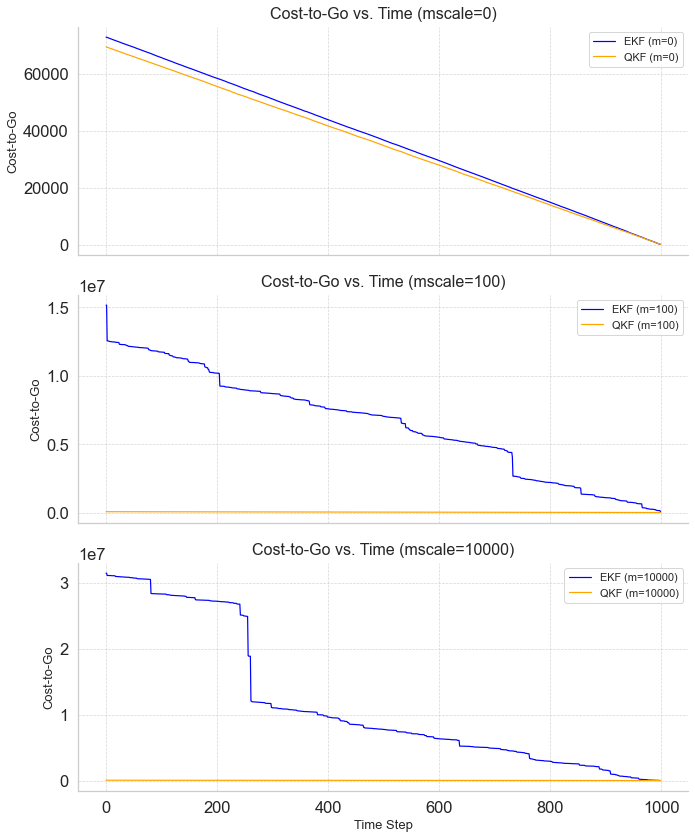

In [7]:
# plot: cost-to-go vs. non-linearity (polished version)
sns.set_theme(style="whitegrid", font_scale=1.5, rc={"lines.linewidth": 2.0})

mscales = [0, 1e2, 1e4]
fig, ax = plt.subplots(len(mscales), 1, figsize=(10, 4 * len(mscales)), sharex=True)

for idx, mscale in enumerate(mscales):
    # load data
    ekf_results_all = pickle.load(open(os.path.join(pkl_dir, f'ekf_results-mscale={int(mscale)}.pkl'), 'rb'))
    qkf_results_all = pickle.load(open(os.path.join(pkl_dir, f'qkf_results-mscale={int(mscale)}.pkl'), 'rb'))

    cost_list_ekf_all = ekf_results_all[2]
    cost_list_qkf_all = qkf_results_all[2]
    cost_list_ekf_avg = np.mean(cost_list_ekf_all, axis=0)
    cost_list_qkf_avg = np.mean(cost_list_qkf_all, axis=0)

    ax[idx].plot(cost_list_ekf_avg, label=f'EKF (m={int(mscale)})', color='blue', linewidth=1.2)
    ax[idx].plot(cost_list_qkf_avg, label=f'QKF (m={int(mscale)})', color='orange', linewidth=1.2)
    ax[idx].set_title(f'Cost-to-Go vs. Time (mscale={int(mscale)})', fontsize=16, pad=8)
    ax[idx].set_ylabel('Cost-to-Go', fontsize=13)
    ax[idx].legend(fontsize=11, frameon=True)
    ax[idx].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.8)

ax[-1].set_xlabel('Time Step', fontsize=13)
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(perf_dir, 'cost_perf_vs_nonlinearity.png'), dpi=300, bbox_inches='tight')
plt.show()